# e-Commerce Recommendation System

#### Our goal is to find customers are purchased or not. 
#### So, Based on my dataset purchase_history is a target variable.

### 1) Data Preparation

In [4]:
# import libraries for Data Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  # For avoid deprecation
warnings.filterwarnings('ignore') 

In [5]:
# retrive data from csv file as e-commerce
data=pd.read_csv('ecommerce_recommendation_dataset.csv')
df=pd.DataFrame(data)
df.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,...,0.13,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,...,0.02,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,...,1.55,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,...,1.41,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,...,1.29,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66


In [6]:
# Shape of DataFrame

df.shape

(60000, 51)

In [7]:
# Information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  60000 non-null  int64  
 1   product_id               60000 non-null  int64  
 2   category                 60000 non-null  object 
 3   price                    60000 non-null  float64
 4   rating                   60000 non-null  int64  
 5   review_count             60000 non-null  int64  
 6   user_age                 60000 non-null  int64  
 7   user_gender              60000 non-null  object 
 8   user_location            60000 non-null  object 
 9   purchase_history         60000 non-null  bool   
 10  time_on_page             60000 non-null  float64
 11  add_to_cart_count        60000 non-null  int64  
 12  search_keywords          60000 non-null  object 
 13  discount_applied         60000 non-null  bool   
 14  user_membership       

In [8]:
df.iloc[0]

user_id                                  78517
product_id                                1645
category                                 Books
price                                   842.23
rating                                       2
review_count                               155
user_age                                    24
user_gender                              Other
user_location                            Urban
purchase_history                         False
time_on_page                             13.86
add_to_cart_count                            6
search_keywords                          Table
discount_applied                         False
user_membership                           Free
user_browser                            Safari
user_device                            Desktop
purchase_time              2024-08-16 10:00:00
session_duration                       2432.93
clicks_on_ads                               12
page_views                                  97
referral_sour

In [9]:
# To Check Missing Values
df.isnull().sum()

user_id                    0
product_id                 0
category                   0
price                      0
rating                     0
review_count               0
user_age                   0
user_gender                0
user_location              0
purchase_history           0
time_on_page               0
add_to_cart_count          0
search_keywords            0
discount_applied           0
user_membership            0
user_browser               0
user_device                0
purchase_time              0
session_duration           0
clicks_on_ads              0
page_views                 0
referral_source            0
wishlist_additions         0
cart_abandonment_rate      0
average_spent              0
user_income                0
user_education             0
user_marital_status        0
product_availability       0
stock_status               0
product_return_rate        0
product_color              0
product_size               0
is_top_seller              0
discount_perce

In [10]:
# Describe for numerical values

df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,60000.0,50109.404617,28913.382290,1.00,25022.5000,50208.500,75141.5000,99997.00
product_id,60000.0,2491.198100,1441.522417,1.00,1245.0000,2481.500,3731.0000,4999.00
price,60000.0,502.938655,288.082193,5.01,252.8025,504.355,752.5925,999.99
rating,60000.0,2.996383,1.415970,1.00,2.0000,3.000,4.0000,5.00
review_count,60000.0,250.173567,144.807302,0.00,124.0000,251.000,375.0000,499.00
user_age,60000.0,43.425617,14.995046,18.00,30.0000,43.000,56.0000,69.00
time_on_page,60000.0,15.221682,8.485544,0.50,7.9100,15.170,22.5625,30.00
add_to_cart_count,60000.0,4.498617,2.863739,0.00,2.0000,5.000,7.0000,9.00
session_duration,60000.0,1797.510736,1037.231985,1.03,901.7925,1798.315,2692.3300,3599.97
clicks_on_ads,60000.0,9.506933,5.771029,0.00,5.0000,10.000,15.0000,19.00


In [11]:
# Describe for Cateragorical values

df.describe(include=['object']).T

,count,unique,top,freq
category,60000,5,Electronics,12122
user_gender,60000,3,Other,20266
user_location,60000,3,Suburban,20066
search_keywords,60000,5,Novel,12094
user_membership,60000,4,Platinum,15132
user_browser,60000,4,Firefox,15078
user_device,60000,3,Tablet,20109
purchase_time,60000,8749,2024-11-30 21:00:00,18
referral_source,60000,4,Search Engine,15240
user_education,60000,4,High School,15119


In [12]:
# Describe for Boolean Values

df.describe(include=['bool']).T

,count,unique,top,freq
purchase_history,60000,2,True,30088
discount_applied,60000,2,True,30052
is_top_seller,60000,2,False,30031
coupon_used,60000,2,False,30030


#### Required Columns and data

In [14]:
# Required columns

df['spending_per_minute'] =df['average_spent']/df['session_duration']
df1=df[['category','user_gender','user_location','price','rating','time_on_page','session_duration', 'product_popularity','spending_per_minute','purchase_history']]

In [15]:
df1.head()

,category,user_gender,user_location,price,rating,time_on_page,session_duration,product_popularity,spending_per_minute,purchase_history
0,Books,Other,Urban,842.23,2,13.86,2432.93,0.54,0.690155,False
1,Books,Other,Suburban,253.76,3,13.03,407.26,0.77,3.146565,False
2,Books,Female,Rural,483.65,2,3.75,3018.87,0.14,0.149732,True
3,Groceries,Female,Urban,459.37,2,6.01,960.00,0.18,4.084240,False
4,Groceries,Female,Urban,150.11,2,6.89,414.98,0.66,1.485493,True


In [16]:
df1.isnull().sum()

category               0
user_gender            0
user_location          0
price                  0
rating                 0
time_on_page           0
session_duration       0
product_popularity     0
spending_per_minute    0
purchase_history       0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()  
categorical_features = ["category", "user_gender", "user_location","purchase_history"]
for col in categorical_features:
    df1[col] = label.fit_transform(df1[col])

In [18]:
print(df1['category'].value_counts())
print(df1['user_location'].value_counts())
print(df1['user_location'].value_counts())

category
2    12122
1    12052
0    12036
3    12012
4    11778
Name: count, dtype: int64
user_location
1    20066
0    19968
2    19966
Name: count, dtype: int64
user_location
1    20066
0    19968
2    19966
Name: count, dtype: int64


In [19]:
df1.head()

,category,user_gender,user_location,price,rating,time_on_page,session_duration,product_popularity,spending_per_minute,purchase_history
0,0,2,2,842.23,2,13.86,2432.93,0.54,0.690155,0
1,0,2,1,253.76,3,13.03,407.26,0.77,3.146565,0
2,0,0,0,483.65,2,3.75,3018.87,0.14,0.149732,1
3,4,0,2,459.37,2,6.01,960.00,0.18,4.084240,0
4,4,0,2,150.11,2,6.89,414.98,0.66,1.485493,1


### 2) Exploratory Data Analysis

In [21]:
X=df1.drop(columns=['purchase_history']) # Features Variable(Input Variable)
y=df1['purchase_history']  # Target Variable

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             60000 non-null  int32  
 1   user_gender          60000 non-null  int32  
 2   user_location        60000 non-null  int32  
 3   price                60000 non-null  float64
 4   rating               60000 non-null  int64  
 5   time_on_page         60000 non-null  float64
 6   session_duration     60000 non-null  float64
 7   product_popularity   60000 non-null  float64
 8   spending_per_minute  60000 non-null  float64
dtypes: float64(5), int32(3), int64(1)
memory usage: 3.4 MB


In [35]:
# Count of Purchased prodect(true) and non-purchased product(False)

true_count = df1['purchase_history'].sum()  # Count of True values
false_count = (df1['purchase_history'] == False).sum()  # Count of False values

print(f"Purchased products count: {true_count}")
print(f"Non purchased products count: {false_count}")


Purchased products count: 30088
Non purchased products count: 29912


In [37]:
df['category'].value_counts()

category
Electronics    12122
Clothing       12052
Books          12036
Furniture      12012
Groceries      11778
Name: count, dtype: int64

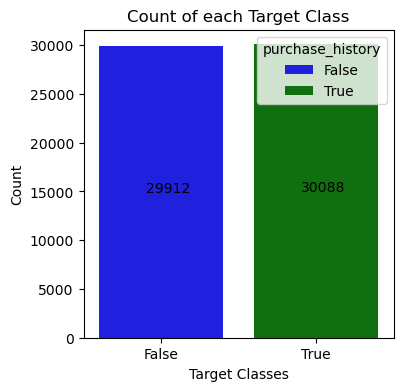

In [39]:
# Count of each Target Class

plt.figure(figsize=(4, 4))
gragh_count= sns.countplot(x='purchase_history',data=df,hue='purchase_history', palette=['blue', 'green']) 
plt.xlabel('Target Classes') 
plt.ylabel('Count') 
plt.title('Count of each Target Class')  


# Get value in bar
for patch in gragh_count.patches:
    count = int(patch.get_height())
    x_coor = patch.get_x()+0.3
    y_coor = count / 2
    if count!=0:
        gragh_count.annotate(count, (x_coor, y_coor),color='black')
plt.show()

In [40]:
X.head()

,category,user_gender,user_location,price,rating,time_on_page,session_duration,product_popularity,spending_per_minute
0,0,2,2,842.23,2,13.86,2432.93,0.54,0.690155
1,0,2,1,253.76,3,13.03,407.26,0.77,3.146565
2,0,0,0,483.65,2,3.75,3018.87,0.14,0.149732
3,4,0,2,459.37,2,6.01,960.00,0.18,4.084240
4,4,0,2,150.11,2,6.89,414.98,0.66,1.485493


In [43]:
df1.head()

,category,user_gender,user_location,price,rating,time_on_page,session_duration,product_popularity,spending_per_minute,purchase_history
0,0,2,2,842.23,2,13.86,2432.93,0.54,0.690155,0
1,0,2,1,253.76,3,13.03,407.26,0.77,3.146565,0
2,0,0,0,483.65,2,3.75,3018.87,0.14,0.149732,1
3,4,0,2,459.37,2,6.01,960.00,0.18,4.084240,0
4,4,0,2,150.11,2,6.89,414.98,0.66,1.485493,1


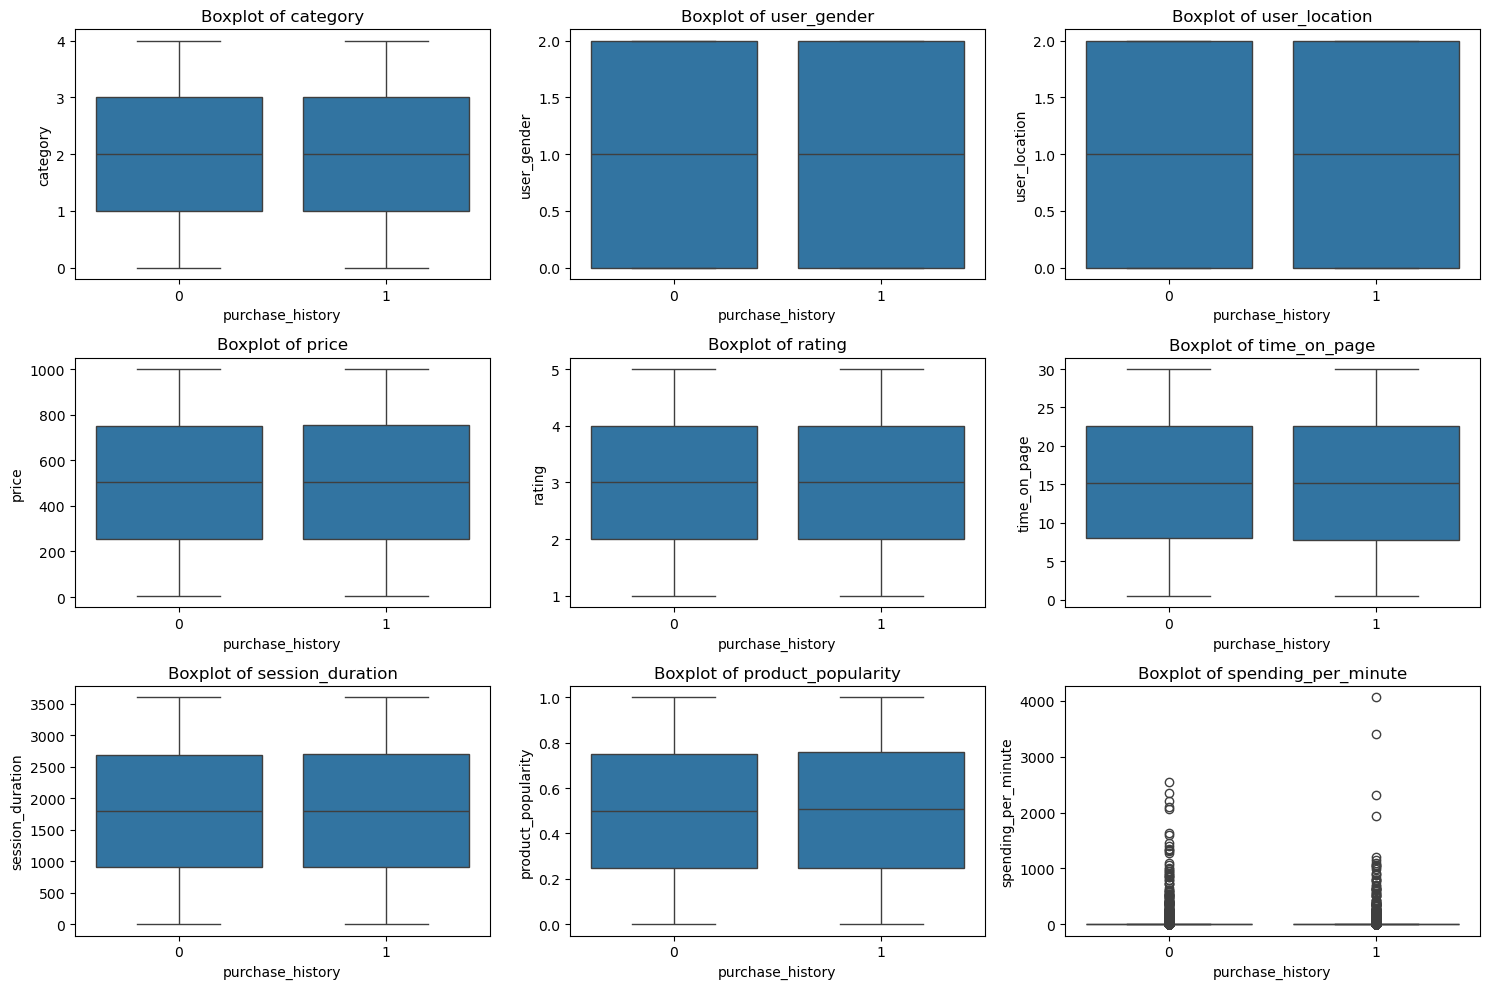

In [45]:
# To check Outlier

plt.figure(figsize=(15, 10))
for i, feature in enumerate(X):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='purchase_history', y=feature, data=df1)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [46]:
df1["spending_per_minute"].describe()

count    60000.000000
mean         5.688774
std         47.335131
min          0.003017
25%          0.697046
50%          1.384347
75%          2.773685
max       4064.611650
Name: spending_per_minute, dtype: float64

In [47]:
Q1 = 0.697046
Q3 = 2.773685
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df1['spending_per_minute'] = np.where(df1['spending_per_minute']>upper_limit, upper_limit,df1['spending_per_minute'])

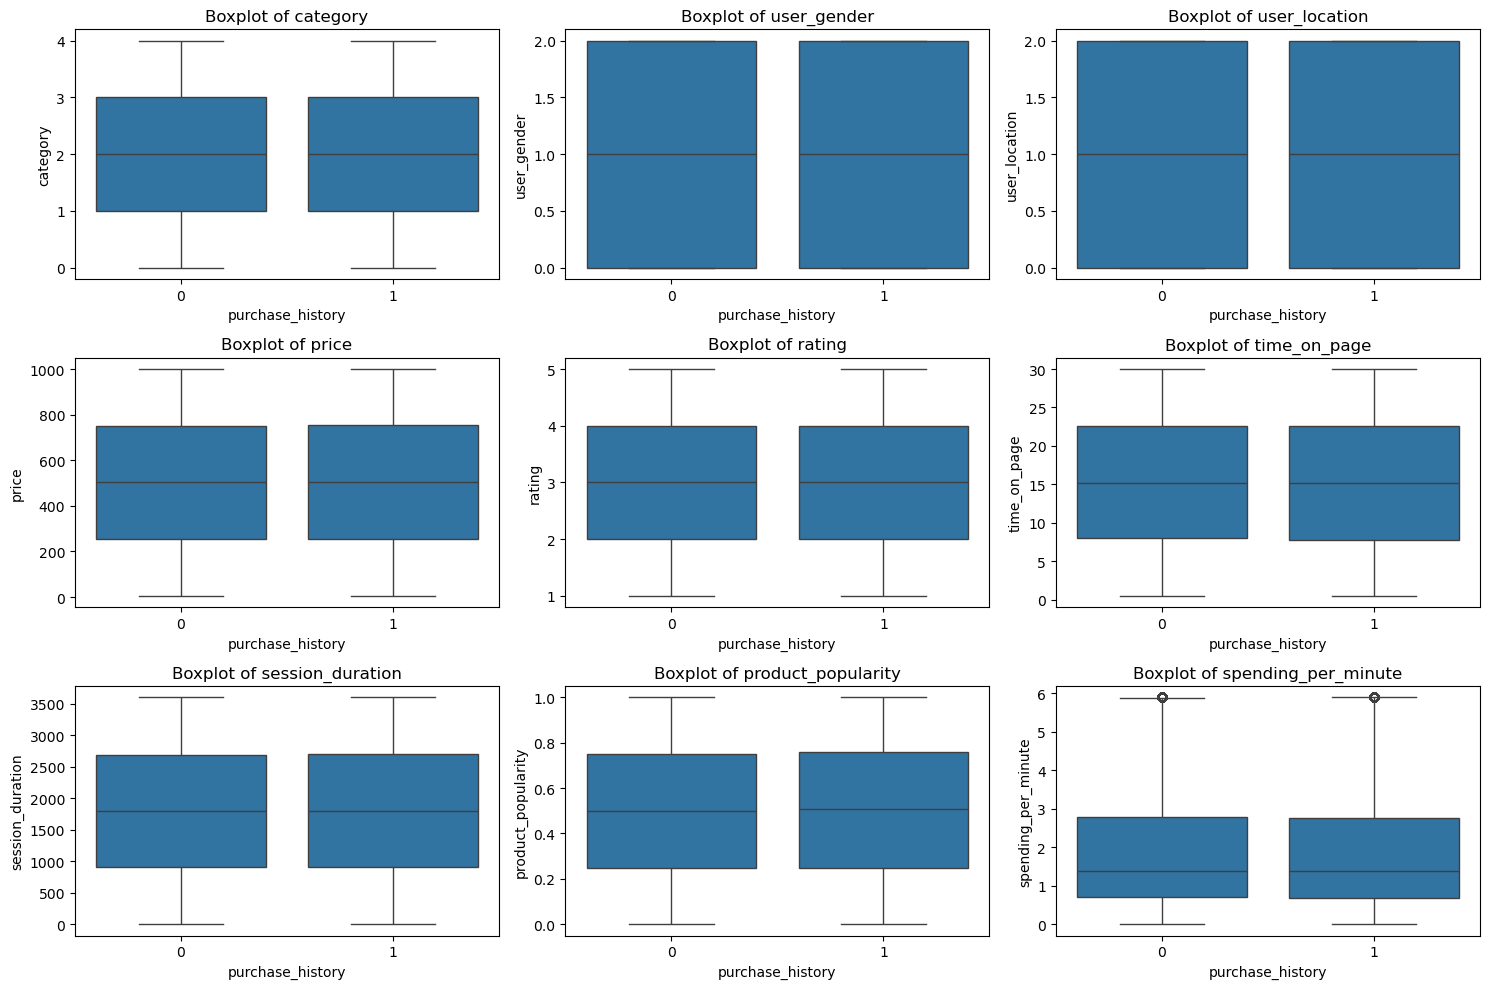

In [52]:
# Removed Outlier

plt.figure(figsize=(15, 10))
for i, feature in enumerate(X):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='purchase_history', y=feature, data=df1)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [54]:
# Correlation

corr_matrix = df1.corr()
corr_matrix

,category,user_gender,user_location,price,rating,time_on_page,session_duration,product_popularity,spending_per_minute,purchase_history
category,1.000000,0.004118,-0.001420,-0.007872,-0.001486,-0.005624,0.001982,-0.000328,-0.002232,-0.001446
user_gender,0.004118,1.000000,0.003520,-0.007199,0.000909,0.000156,0.000695,0.002610,0.002290,0.004439
user_location,-0.001420,0.003520,1.000000,0.003127,-0.006493,0.000758,0.001659,-0.003904,0.002734,-0.003841
price,-0.007872,-0.007199,0.003127,1.000000,-0.001965,-0.002197,-0.000339,-0.001021,0.000349,0.000565
rating,-0.001486,0.000909,-0.006493,-0.001965,1.000000,-0.001677,-0.002521,0.000401,-0.002636,0.005504
time_on_page,-0.005624,0.000156,0.000758,-0.002197,-0.001677,1.000000,-0.001737,-0.004101,0.001718,-0.002699
session_duration,0.001982,0.000695,0.001659,-0.000339,-0.002521,-0.001737,1.000000,-0.003204,-0.721963,0.001302
product_popularity,-0.000328,0.002610,-0.003904,-0.001021,0.000401,-0.004101,-0.003204,1.000000,0.006796,0.009526
spending_per_minute,-0.002232,0.002290,0.002734,0.000349,-0.002636,0.001718,-0.721963,0.006796,1.000000,-0.006250
purchase_history,-0.001446,0.004439,-0.003841,0.000565,0.005504,-0.002699,0.001302,0.009526,-0.006250,1.000000


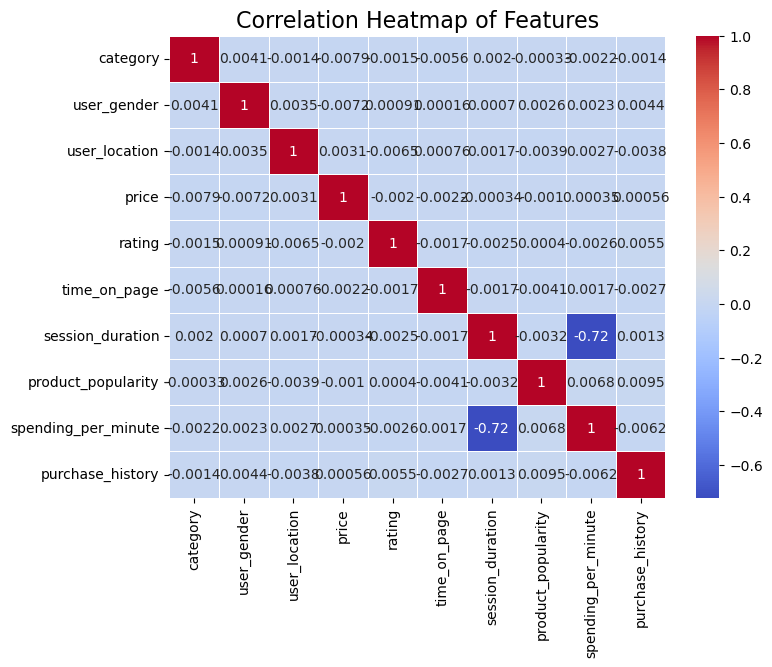

In [56]:
# Plot the correlation heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

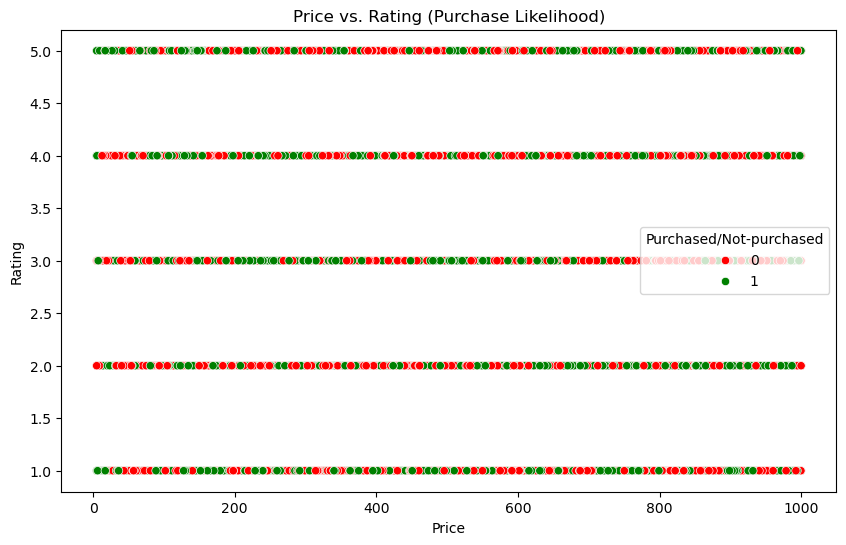

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='price', y='rating', hue='purchase_history', palette={True: 'green', False: 'red'})
plt.title("Price vs. Rating (Purchase Likelihood)")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.legend(title="Purchased/Not-purchased", loc="center right")
plt.show()

### 3) Model Building

In [70]:
# Model Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=42)

In [72]:
X_train.shape

(42000, 9)

In [74]:
X_test.shape

(18000, 9)

In [76]:
# import algorithm libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

### Predicting Training DataSet

In [79]:
#Logistic Regression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
model_lr=lr
y_pred_lr = lr.predict(X_train)

#Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
model_dt=dt
y_pred_dt = dt.predict(X_train)

#Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
model_rf=rf
y_pred_rf = rf.predict(X_train)

#XGBoost classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
model_xgb=xgb
y_pred_xgb=xgb.predict(X_train)


### Accuracy Score for train

In [81]:
# Logistic Regression
lr_acc=accuracy_score(y_train,y_pred_lr) 
LR=lr_acc*100
print(f"The score for Logistic Regression is {LR:.2f}% with estimators.")
print(" ")
 
#Decision Tree
dt_acc=accuracy_score(y_train,y_pred_dt) 
DT=dt_acc*100
print(f"The score for Decision Treen is {DT:.2f}% with estimators.")
print(" ")
 
# Random Forest
rf_acc=accuracy_score(y_train,y_pred_rf) 
RF=rf_acc*100
print(f"The score for Random Forest is {RF:.2f}% with estimators.")
print(" ")
 
# XGBoost
xgb_acc=accuracy_score(y_train,y_pred_xgb) 
XGB=xgb_acc*100
print(f"The score for Support Vector Machine is {XGB:.2f}% with estimators.")
print(" ")

The score for Logistic Regression is 50.85% with estimators.
 
The score for Decision Treen is 100.00% with estimators.
 
The score for Random Forest is 100.00% with estimators.
 
The score for Support Vector Machine is 74.13% with estimators.
 


### Predicting Testing DataSet

In [84]:
#Logistic Regression

lrt = LogisticRegression(max_iter=10000)
lrt.fit(X_train, y_train)
model_lrt=lrt
y_pred_lrt = lrt.predict(X_test)

#Decision Tree

dtt = DecisionTreeClassifier(random_state=42)
dtt.fit(X_train, y_train)
model_dtt=dtt
y_pred_dtt = dtt.predict(X_test)

#Random Forest

rft = RandomForestClassifier(random_state=42)
rft.fit(X_train, y_train)
model_rft=rft
y_pred_rft = rft.predict(X_test)

#XGBoost classifier

xgbt = XGBClassifier()
xgbt.fit(X_train, y_train)
model_xgbt=xgbt
y_pred_xgbt=xgbt.predict(X_test)


### Accuracy Score for testing

In [86]:
# Logistic Regression
lrt_acc=accuracy_score(y_test,y_pred_lrt) 
LRt=lrt_acc*100
print(f"The score for Logistic Regression is {LRt:.2f}% with estimators.")
print(" ")
 
#Decision Tree
dtt_acc=accuracy_score(y_test,y_pred_dtt) 
DTt=dtt_acc*100
print(f"The score for Decision Treen is {DTt:.2f}% with estimators.")
print(" ")
 
# Random Forest
rft_acc=accuracy_score(y_test,y_pred_rft) 
RFt=rft_acc*100
print(f"The score for Random Forest is {RFt:.2f}% with estimators.")
print(" ")
 
# XGBoost
xgbt_acc=accuracy_score(y_test,y_pred_xgbt) 
XGBt=xgbt_acc*100
print(f"The score for Support Vector Machine is {XGBt:.2f}% with estimators.")
print(" ")

The score for Logistic Regression is 50.04% with estimators.
 
The score for Decision Treen is 49.46% with estimators.
 
The score for Random Forest is 49.94% with estimators.
 
The score for Support Vector Machine is 49.29% with estimators.
 


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

def evaluate_model(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.2f}")
    print(f"roc_auc_score: {roc_auc_score(y_true, y_pred):.2f}")

print("Logistic Regression Evaluation:")
evaluate_model(y_train, y_pred_lr)

print("\nDecision Tree Evaluation:")
evaluate_model(y_train, y_pred_dt)

print("\nRandom Forest Evaluation:")
evaluate_model(y_train, y_pred_rf)

print("\nXGBoost Evaluation:")
evaluate_model(y_train, y_pred_xgb)

Logistic Regression Evaluation:
Accuracy: 0.51
Precision: 0.51
Recall: 0.56
F1-Score: 0.53
roc_auc_score: 0.51

Decision Tree Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
roc_auc_score: 1.00

Random Forest Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
roc_auc_score: 1.00

XGBoost Evaluation:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-Score: 0.74
roc_auc_score: 0.74


In [ ]:
model_dt

In [ ]:
df1.info()

In [92]:
df1.tail(7)

,category,user_gender,user_location,price,rating,time_on_page,session_duration,product_popularity,spending_per_minute,purchase_history
59993,2,2,0,276.79,3,25.89,1802.64,0.15,0.224576,1
59994,4,1,2,228.85,1,19.01,2524.49,0.09,0.321895,1
59995,2,0,2,700.93,3,21.75,809.81,0.48,3.487077,0
59996,0,2,0,80.89,2,9.23,3201.42,0.57,0.915790,1
59997,0,1,0,485.10,5,26.95,2901.05,0.03,0.344075,0
59998,3,0,1,915.42,3,11.63,2425.51,0.54,2.022028,0
59999,2,1,2,304.47,4,10.15,3037.46,0.10,0.753482,0


In [94]:
category=float(input("Enter the category: "))
user_gender=float(input("Enter the user_gender: "))
user_location=float(input("Enter the user_location: "))
price=float(input("Enter the price: "))
rating=float(input("Enter the rating: "))
time_on_page=float(input("Enter the time_on_page: "))
session_duration=float(input("Enter the session_duration: "))
product_popularity=float(input("Enter the product_popularity: "))
spending_per_minute=float(input("Enter the spending_per_minute: "))
#0	2	0	80.89	2	9.23	3201.42	0.57	0.915790	1


Enter the category:  0.0
Enter the user_gender:  2.0
Enter the user_location:  0.0
Enter the price:  80.89
Enter the rating:  2.0
Enter the time_on_page:  9.23
Enter the session_duration:  3201.42
Enter the product_popularity:  0.57
Enter the spending_per_minute:  0.915790


In [96]:
col=np.array([category, user_gender,user_location, price, rating,time_on_page, session_duration, product_popularity,spending_per_minute])
col

array([0.00000e+00, 2.00000e+00, 0.00000e+00, 8.08900e+01, 2.00000e+00,
       9.23000e+00, 3.20142e+03, 5.70000e-01, 9.15790e-01])

In [99]:
Result=model_dt.predict([col])
Result

array([1], dtype=int64)

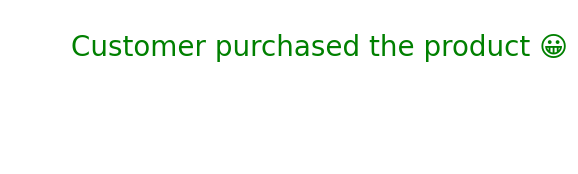

In [101]:
import emoji
if Result==0:
    plt.figure(figsize=(4,2))
    plt.text(1.0, 0.7,emoji.emojize("Customer didn't purchased the product. :tired_face:"),  fontsize=20, ha='center', color='red')
    plt.axis('off')
    plt.show()
    
else:
    plt.figure(figsize=(4,2))
    plt.text(1.0, 0.7, emoji.emojize("Customer purchased the product :grinning_face:"), fontsize=20, ha='center', color='green')
    plt.axis('off')
    plt.show()